In [2]:
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
ms = DataReader('MS',  'yahoo', datetime(2019,1,1), datetime(2020,8,31))
returns = pd.DataFrame(np.diff(np.log(ms['Adj Close'].values)))
returns.index = ms.index.values[1:ms.index.values.shape[0]]
returns.columns = ['MS Returns']

In [3]:
ms

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,40.720001,38.759998,39.020000,40.400002,10648000.0,38.113232
2019-01-03,40.220001,39.250000,40.220001,39.680000,13034500.0,37.433983
2019-01-04,41.580002,40.279999,40.500000,41.299999,14371600.0,38.962288
2019-01-07,42.160000,40.980000,41.509998,41.709999,11812400.0,39.349075
2019-01-08,42.410000,41.080002,42.299999,41.450001,11398200.0,39.103790
...,...,...,...,...,...,...
2020-08-25,52.889999,51.849998,52.810001,52.049999,8425500.0,51.667038
2020-08-26,52.110001,51.610001,51.990002,51.709999,5920800.0,51.329536
2020-08-27,52.869999,51.680000,51.759998,52.610001,8910100.0,52.222916


In [4]:
ms1=ms[['Adj Close']]

In [5]:
ms1

,Adj Close
Date,
2019-01-02,38.113232
2019-01-03,37.433983
2019-01-04,38.962288
2019-01-07,39.349075
2019-01-08,39.103790
...,...
2020-08-25,51.667038
2020-08-26,51.329536
2020-08-27,52.222916


In [6]:
ms.reset_index(inplace=True)

ms.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
date =ms[['Date']]

In [8]:
date

,Date
0,2019-01-02
1,2019-01-03
2,2019-01-04
3,2019-01-07
4,2019-01-08
...,...
415,2020-08-25
416,2020-08-26
417,2020-08-27
418,2020-08-28


In [9]:
corr = ms.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.991588,0.994211,0.995031,-0.253234,0.992551
Low,0.991588,1.000000,0.994835,0.994370,-0.330185,0.984873
Open,0.994211,0.994835,1.000000,0.989874,-0.294519,0.984318
Close,0.995031,0.994370,0.989874,1.000000,-0.294351,0.993607
Volume,-0.253234,-0.330185,-0.294519,-0.294351,1.000000,-0.271353
Adj Close,0.992551,0.984873,0.984318,0.993607,-0.271353,1.000000


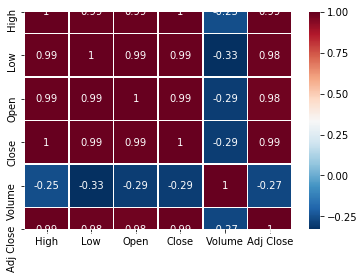

In [10]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)

Text(0.5, 1.0, 'MS Autocorrelation plot')

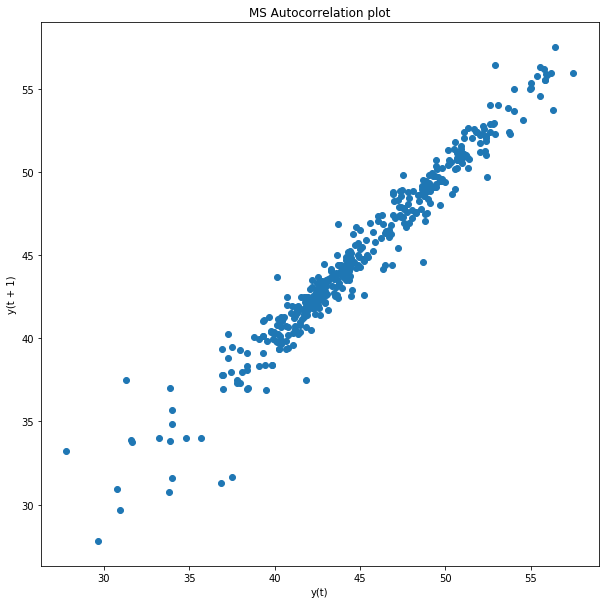

In [11]:
from pandas.plotting import lag_plot
plt.figure(figsize=(10,10))
lag_plot(ms['Close'], lag=1)
plt.title('MS Autocorrelation plot')

In [12]:



import numpy as np
import scipy.stats as ss
import numpy as np
import scipy.stats as ss
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime

MS = DataReader('MS',  'yahoo', datetime(2019,1,1), datetime(2020,8,31))
Y = np.diff(np.log(MS['Adj Close'].values))
T = Y.shape[0];

SPY = DataReader('SPY',  'yahoo', datetime(2019,1,1), datetime(2020,8,31))
F1 = np.diff(np.log(SPY['Adj Close'].values))
#QQQ = DataReader('QQQ',  'yahoo', datetime(2019,1,1), datetime(2020,8,31))
#F2 = np.diff(np.log(QQQ['Adj Close'].values))

'Add Constant to X'
X = np.column_stack([np.ones((T,1)), F1])
N = X.shape[1]

'OLS REGRESSION STARTS'
'Linear Regression of Y: T x 1 on'
'Regressors X: T x N'
invXX = np.linalg.inv(X.transpose()@X)
'OLS estimates for coefficients: X x 1'
beta_hat = invXX@X.transpose()@Y
'Predictive value of Y using OLS'
y_hat = X@beta_hat
'Residuals from OLS'
residuals = Y - y_hat
'Variance of residuals'
sigma2 = (1/T)*residuals.transpose()@residuals
'standard deviation of Y or residuals'
sigma = np.sqrt(sigma2)

'variance-covariance matrix of beta_hat'
varcov_beta_hat = (sigma2)*invXX
std_beta_hat = np.sqrt(T*np.diag(varcov_beta_hat))

'Calculate R-square'
R_square = 1- (residuals.transpose()@residuals)/(T*np.var(Y))
adj_R_square = 1-(1-R_square)*(T-1)/(T-N)

'Test Each Coefficient: beta_i'
'Null Hypothesis: beta_i = 0'
t_stat = (beta_hat.transpose()-0)/std_beta_hat
p_val_t = 1-ss.norm.cdf(t_stat)

'Test of Joint Significance of Model'
F_stat = (beta_hat.transpose()@np.linalg.inv(varcov_beta_hat)@beta_hat/N)/\
         (residuals.transpose()@residuals/(T-N))

p_val_F = 1-ss.f.cdf(F_stat,N-1,T-N)


REPORT = np.column_stack([beta_hat, t_stat,p_val_t])
print('Regression Statistics')
print('------------------------\n')
print(' REGRESSION STATISTICS  \n') 
print('------------------------\n')
print('beta             t_stat            p_val\n')
print(REPORT)
print('\n Joint significance of all coefficients\n',[F_stat,p_val_F])
print('R-Square is       \n',R_square)
print('Adjusted R Square \n',adj_R_square)
print('Standard Error    \n',sigma)
print('Observations      \n',T) 
print('-------------------------\n')

Regression Statistics
------------------------

 REGRESSION STATISTICS  

------------------------

beta             t_stat            p_val

[[-5.47626657e-04 -3.89729979e-02  5.15544042e-01]
 [ 1.48222852e+00  1.76786978e+00  3.85413382e-02]]

 Joint significance of all coefficients
 [3312132.251224146, 1.1102230246251565e-16]
R-Square is       
 0.75759712141821
Adjusted R Square 
 0.7570158195511074
Standard Error    
 0.01403267249892391
Observations      
 419
-------------------------



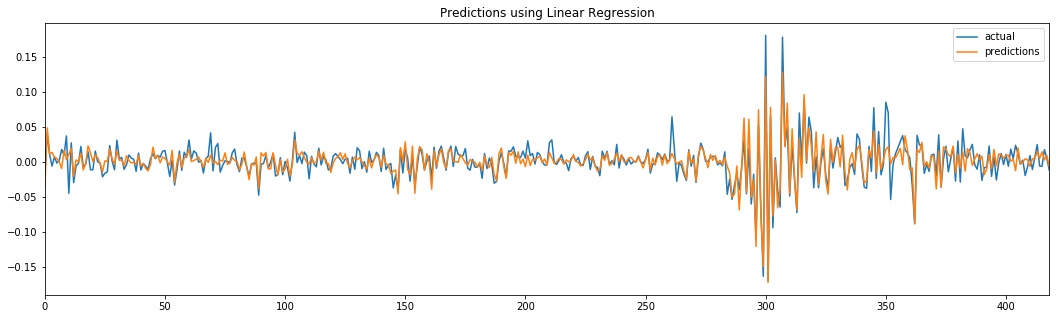

In [13]:
pred = pd.DataFrame(y_hat)
act = pd.DataFrame(Y)

plot_df = pd.DataFrame({"actual": act[0], "predictions": pred[0]})
plot_df.plot(figsize=(18, 5), title='Predictions using Linear Regression')


In [28]:
rmse=np.sqrt(np.mean((Y - y_hat )**2))
rmse

0.01403267249892391

In [29]:
print('RMSE is       \n',rmse)

RMSE is       
 0.01403267249892391


In [14]:
ms['Date'] = pd.to_datetime(ms.Date, format='%Y-%m-%d')
ms.index = ms['Date']


    

In [15]:

# Create a new DataFrame with only closing price and date
df = pd.DataFrame(ms, columns=['Close'])

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)

In [18]:

# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [20]:
# Create LinearRegression Object
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:

# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.011189168875406713
Intercept:  42.36144673080007


#### Interpreting the coefficients:
#### The slope coefficient tells us that with a 1 unit increase in date the closing price increases by 0.0117 
#### The intercept coefficient is the price at wich the closing price measurement started, the stock price value at date zero

In [22]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
y_pred = model.predict(X_test)

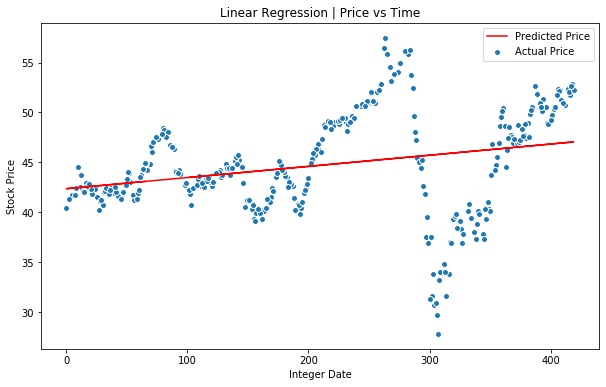

In [26]:

# Train set graph
plt.figure(1, figsize=(10,6))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

In [ ]:
from sklearn import metrics
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Ridge Regression

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
print(X_train.shape)
print(y_train.size)
model_ridge = linear_model.Ridge()
model_ridge.fit(X_train, y_train)
model_ridge.score(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
from sklearn.linear_model import Ridge

rr = Ridge(alpha=40.0)   # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely

rr.fit(X_train, y_train)

rr110 = Ridge(alpha=110) #  comparison with alpha value
rr110.fit(X_train, y_train)


print("Regulrization L2 train score : ",  rr.score(X_train,y_train)*100)
print("Regulrization L2 test score : ", rr.score(X_test, y_test)*100)
print("Regulrization L2 train score for alpha = 100: ",  rr110.score(X_train,y_train)*100)
print("Regulrization L2 test score for alpha = 100: ",rr110.score(X_test, y_test)*100)

In [ ]:
y_pred = model_ridge.predict(X_test)
print(y_test.shape)
print(y_pred.shape)
plt.scatter(y_test, y_pred)
plt.xlabel("Close price: $Y_i$")
plt.ylabel("Predicted Close price: $\hat{y}_i$")
plt.title("Ridge Regression : $Y_i$ vs $\hat{y}_i$")